In [446]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [447]:
# import data
df = pd.read_csv('basic_project_timelines.csv')

In [448]:
df.dtypes

Proect Name    object
Size           object
Start Date     object
End Date       object
dtype: object

In [449]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

# Convert to lowercase
df.columns = df.columns.str.lower()

In [450]:
# Convert date columns to datetime
date_columns = ['start_date', 'end_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

In [ ]:
# Create column for the number of weeks between start and end dates
df['duration_weeks'] = (df['end_date'] - df['start_date']).dt.days / 7

count    20.000000
mean     22.414286
std      16.784596
min       0.428571
25%      12.500000
50%      17.642857
75%      29.928571
max      60.714286
Name: duration_weeks, dtype: float64

In [452]:
#df

In [459]:
# custom_order = ['XL', 'L', 'M', 'S', 'XS']
# plt.figure(figsize=(16, 8))
# palette = sns.color_palette("rocket", len(custom_order))

# # Create KDE plots for each size category
# sns.kdeplot(data=df, x='duration_weeks', hue='size', common_norm=False, palette=palette,
#             fill=True, alpha=0.5, linewidth=1.5, bw_adjust=0.5)


# plt.suptitle('Data Surge Team Project Duration by Size', fontsize=18, y=0.98)
# plt.xlabel('Duration (weeks)', fontsize=14)
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.15, top=0.95)
# plt.show()

/var/folders/_d/kq_dbf_92dxdd4gmrnvm_b1m0000gq/T/ipykernel_7385/509807405.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=size_data, x='duration_weeks',


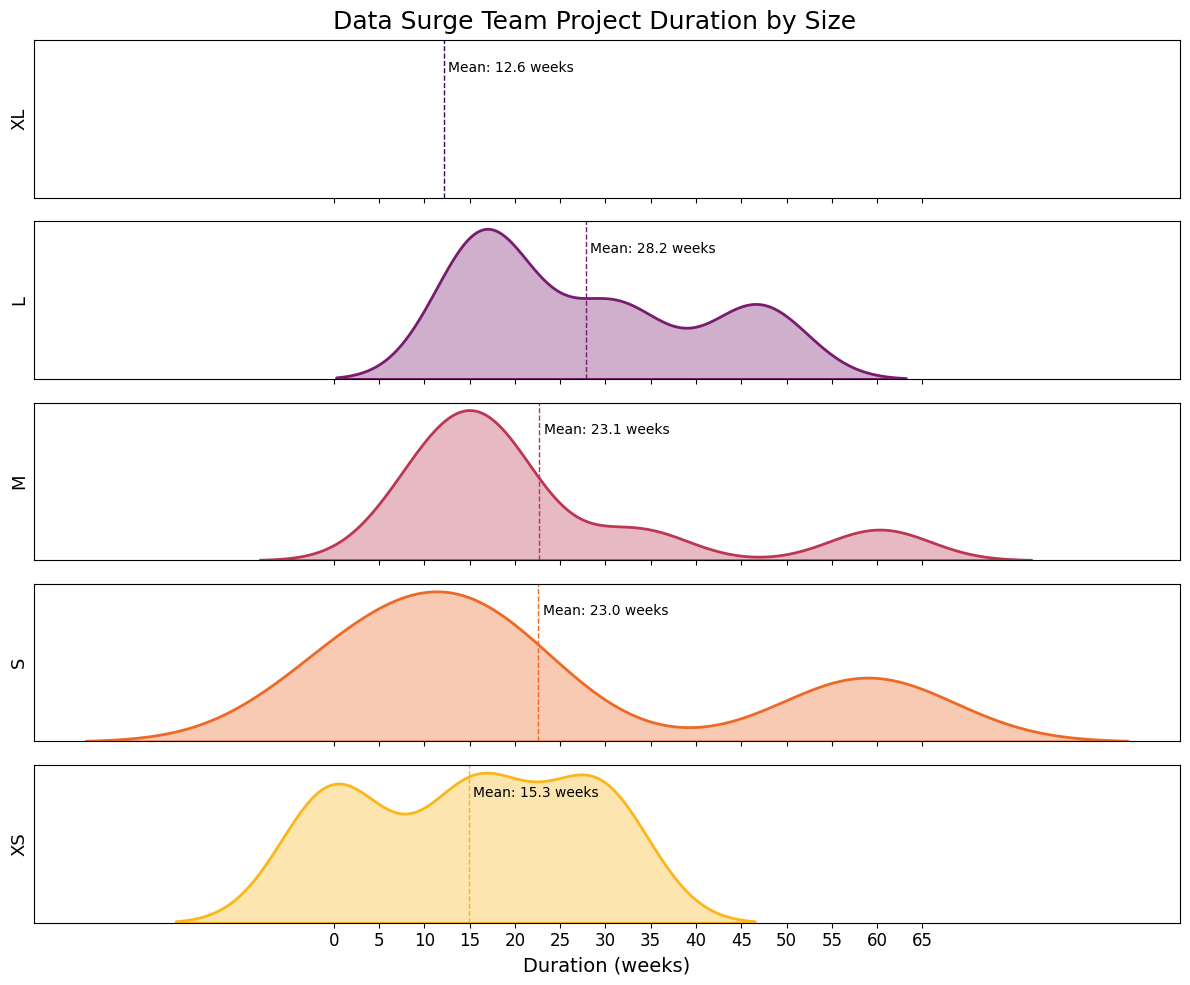

In [454]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

custom_order = ['XL', 'L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(12, 10), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate KDE plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size'] == size]
    
    sns.kdeplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=True, alpha=0.35,
                linewidth=2, bw_adjust=0.5, ax=axes[i])
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity

    # mean duration line
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1] * 0.8, 
                 f'Mean: {mean_duration:.1f} weeks', color="black")

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Data Surge Team Project Duration by Size', fontsize=18, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()


/var/folders/_d/kq_dbf_92dxdd4gmrnvm_b1m0000gq/T/ipykernel_7385/829726709.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=size_data, x='duration_weeks',


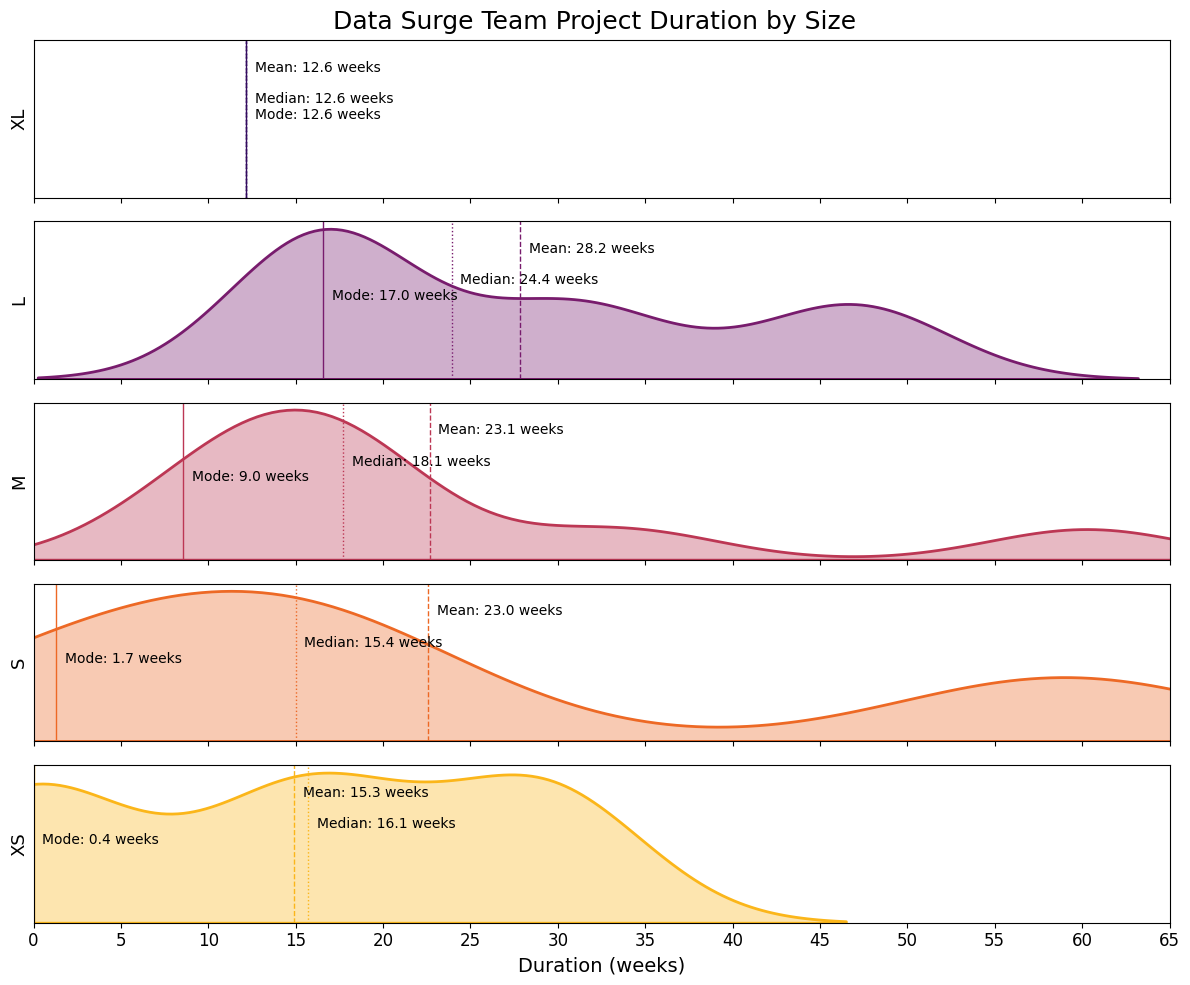

In [455]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

custom_order = ['XL', 'L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(12, 10), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate KDE plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size'] == size]
    
    sns.kdeplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=True, alpha=0.35,
                linewidth=2, bw_adjust=0.5, ax=axes[i])
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity

    # mean duration line
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1] * 0.8, 
                 f'Mean: {mean_duration:.1f} weeks', color="black")
    
    #median duration line
    median_duration = size_data['duration_weeks'].median()
    axes[i].axvline(x=median_duration, color=palette[i], linestyle=':', linewidth=1)
    axes[i].text(median_duration + 0.5, axes[i].get_ylim()[1] * 0.6, 
                 f'Median: {median_duration:.1f} weeks', color="black")
    
    #mode duration line
    mode_duration = size_data['duration_weeks'].mode()[0]
    axes[i].axvline(x=mode_duration, color=palette[i], linestyle='-', linewidth=1)
    axes[i].text(mode_duration + 0.5, axes[i].get_ylim()[1] * 0.5, 
                 f'Mode: {mode_duration:.1f} weeks', color="black")
    axes[i].set_xlim(x_min, x_max)

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Data Surge Team Project Duration by Size', fontsize=18, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()


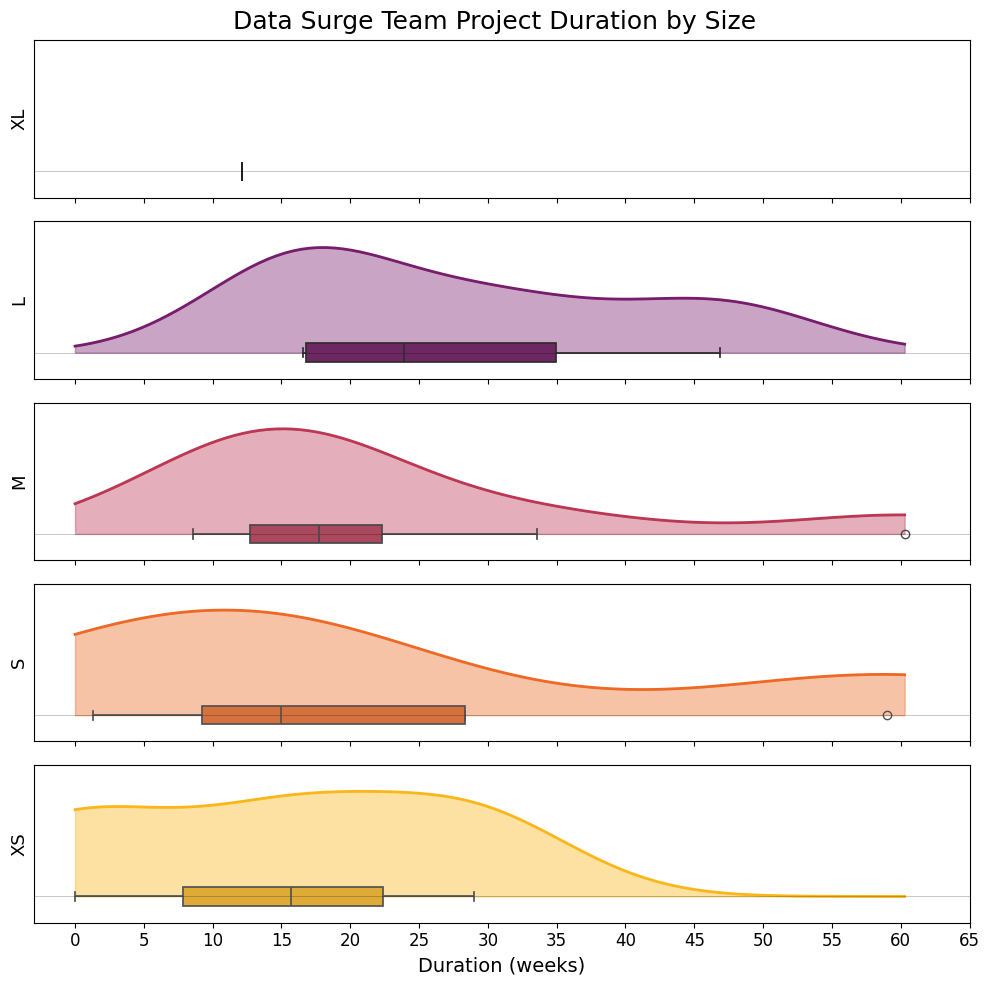

In [458]:
custom_order = ['XL', 'L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(10, 10), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate boxplot plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size'] == size]
    
    # Create boxplot FIRST at y=0 with explicit width control
    sns.boxplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=True, 
                linewidth=1.25, ax=axes[i], width=0.07, zorder=2)
    
    # Generate KDE using scipy AFTER the boxplot
    data = size_data['duration_weeks'].dropna()
    if len(data) > 1:  # Check if we have enough data points
        x_kde = np.linspace(x_min, x_max, 100)
        kde = stats.gaussian_kde(data, bw_method=0.5)
        y_kde = kde(x_kde)
        
        # Scale the KDE
        y_kde = y_kde / np.max(y_kde) * 0.4  # Scale to appropriate height
        
        # Plot the KDE above the x-axis with the curve arching upward
        axes[i].fill_between(x_kde, 0, y_kde, color=palette[i], alpha=0.4, zorder=1)
        axes[i].plot(x_kde, y_kde, color=palette[i], linewidth=2, zorder=1)
    
    # Set y-axis limits to show the full KDE curve above the boxplot
    axes[i].set_ylim(-0.1, 0.5)  # Adjusted to show the full upward curve
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity
    
    # Add horizontal line at y=0
    axes[i].axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Data Surge Team Project Duration by Size', fontsize=18, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()